#### Import Dependencies

In [252]:
# define keys and dependencies: 
import pandas as pd
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

#### Set the path to the data file

In [253]:
# Obtaining the data from Co2_data Csv:
f_path=os.path.join("CO2_data.csv")
Co2_Emissions=pd.read_csv(f_path)
Co2_Emissions.head(100)

,country,year,co2,co2_growth_prct,co2_growth_abs,consumption_co2,trade_co2,trade_co2_share,co2_per_capita,consumption_co2_per_capita,...,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,primary_energy_consumption,energy_per_capita,energy_per_gdp,population,gdp
0,Afghanistan,1949,0.015,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7663783.0,NaN
1,Afghanistan,1950,0.084,475.000,0.070,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7752000.0,1.949480e+10
2,Afghanistan,1951,0.092,8.696,0.007,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7840000.0,2.006385e+10
3,Afghanistan,1952,0.092,0.000,0.000,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7936000.0,2.074235e+10
4,Afghanistan,1953,0.106,16.000,0.015,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8040000.0,2.201546e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Africa,1776,0.000,NaN,0.000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,Africa,1777,0.000,NaN,0.000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,Africa,1778,0.000,NaN,0.000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,Africa,1779,0.000,NaN,0.000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### List all the columns in the table

In [254]:
# Defining your columns to narrow your area of analysis:
Co2_Emissions.columns

Index(['country', 'year', 'co2', 'co2_growth_prct', 'co2_growth_abs',
       'consumption_co2', 'trade_co2', 'trade_co2_share', 'co2_per_capita',
       'consumption_co2_per_capita', 'share_global_co2', 'cumulative_co2',
       'share_global_cumulative_co2', 'co2_per_gdp', 'consumption_co2_per_gdp',
       'co2_per_unit_energy', 'cement_co2', 'coal_co2', 'flaring_co2',
       'gas_co2', 'oil_co2', 'cement_co2_per_capita', 'coal_co2_per_capita',
       'flaring_co2_per_capita', 'gas_co2_per_capita', 'oil_co2_per_capita',
       'total_ghg', 'ghg_per_capita', 'methane', 'methane_per_capita',
       'nitrous_oxide', 'nitrous_oxide_per_capita',
       'primary_energy_consumption', 'energy_per_capita', 'energy_per_gdp',
       'population', 'gdp'],
      dtype='object')

#### New table that contains the columns within the area of interest analysis 

In [255]:
# Check for Null Values and create a new data frame: 
Co2_Emissions.isnull().any()
Co2_Emissions.count()
Co2_Emissions_df=Co2_Emissions[["country","year","co2","co2_growth_prct","consumption_co2","cumulative_co2","total_ghg",'ghg_per_capita', 'methane', 'methane_per_capita',
       'nitrous_oxide', 'nitrous_oxide_per_capita','primary_energy_consumption',"co2_growth_abs", 'energy_per_capita',"co2_per_capita",'population']]
Co2_Emissions_df=Co2_Emissions_df.loc[Co2_Emissions_df["year"] >=1980]
Co2_Emissions_df=Co2_Emissions_df.reset_index()
del Co2_Emissions_df["index"]

In [256]:
# Group by country to compare CO2 Levels:
Co2_Emissions_df.groupby("country").count()
Co2_Emissions_df

,country,year,co2,co2_growth_prct,consumption_co2,cumulative_co2,total_ghg,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,primary_energy_consumption,co2_growth_abs,energy_per_capita,co2_per_capita,population
0,Afghanistan,1980,1.757,-21.383,NaN,31.814,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.478,NaN,0.0,13357000.0
1,Afghanistan,1981,1.979,12.655,NaN,33.793,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.222,NaN,0.0,13172000.0
2,Afghanistan,1982,2.096,5.869,NaN,35.888,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.116,NaN,0.0,12883000.0
3,Afghanistan,1983,2.520,20.260,NaN,38.409,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.425,NaN,0.0,12538000.0
4,Afghanistan,1984,2.822,11.996,NaN,41.231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.302,NaN,0.0,12204000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9438,Zimbabwe,2014,11.962,2.838,12.760,671.105,66.10,4.865,11.24,0.827,6.27,0.461,NaN,0.330,NaN,0.0,13587000.0
9439,Zimbabwe,2015,12.163,1.685,13.010,683.268,67.49,4.885,11.87,0.859,6.68,0.484,NaN,0.202,NaN,0.0,13815000.0
9440,Zimbabwe,2016,10.807,-11.146,11.809,694.076,65.98,4.703,11.92,0.850,6.55,0.467,NaN,-1.356,NaN,0.0,14030000.0
9441,Zimbabwe,2017,12.026,11.274,12.531,706.102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.218,NaN,0.0,14237000.0


C:\Users\osama\anaconda3\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Automatic legend placement (loc='best') not implemented for figure legend. Falling back on 'upper right'. This will raise an exception in 3.3.
  from ipykernel import kernelapp as app


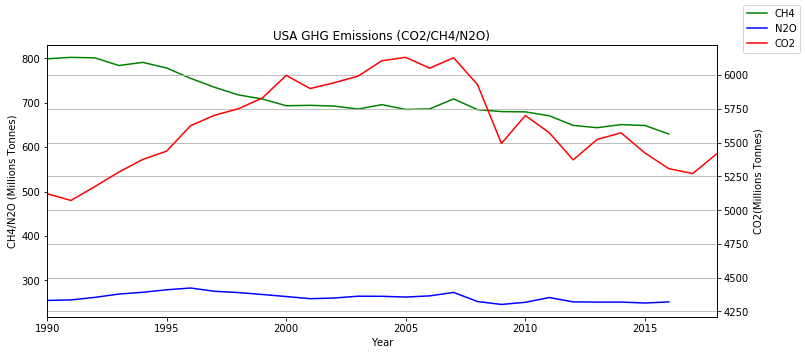

In [257]:
# Analyzing Co2 Emissions:
Co2_Emissions_USA=Co2_Emissions_df[Co2_Emissions_df.country=="United States"]
Co2_Emissions_USA=Co2_Emissions_USA.reset_index(drop=True)
fig,ax=plt.subplots(figsize=(12,5))
ax.plot(Co2_Emissions_USA.year,Co2_Emissions_USA.methane,color="green",label="CH4")
ax.plot(Co2_Emissions_USA.year,Co2_Emissions_USA.nitrous_oxide,color="blue",label="N2O")
plt.ylabel("CH4/N2O (Millions Tonnes)")
plt.xlabel("Year")
ax2=ax.twinx()
ax2.plot(Co2_Emissions_USA.year,Co2_Emissions_USA.co2,color="red",label="CO2")
plt.title("USA GHG Emissions (CO2/CH4/N2O)")
plt.ylabel("CO2(Millions Tonnes)")
plt.xlim(1990,2018)
plt.grid()
fig.legend(loc="best")
plt.savefig("USA GHG Emissions")

C:\Users\osama\anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Automatic legend placement (loc='best') not implemented for figure legend. Falling back on 'upper right'. This will raise an exception in 3.3.
  # This is added back by InteractiveShellApp.init_path()


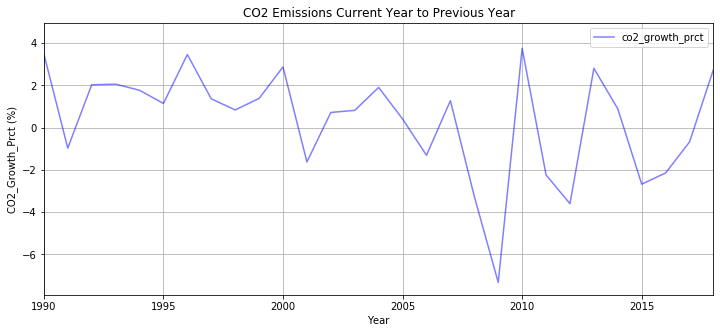

In [258]:
# Analyzing CH4 Emissions:
Co2_Emissions_USA=Co2_Emissions_df[Co2_Emissions_df.country=="United States"]
Co2_Emissions_USA=Co2_Emissions_USA.reset_index(drop=True)
Co2_Emissions_USA_chart=Co2_Emissions_USA.plot.line(x='year', y='co2_growth_prct',color="blue",alpha=0.5,figsize=(12,5))
plt.xlabel("Year")
plt.xlim(1990,2018)
plt.ylabel("CO2_Growth_Prct (%)")
plt.xlabel("Year")
plt.title("CO2 Emissions Current Year to Previous Year")
plt.grid()
fig.legend(loc="best")
plt.savefig("Global GHG Emissions")

C:\Users\osama\anaconda3\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Automatic legend placement (loc='best') not implemented for figure legend. Falling back on 'upper right'. This will raise an exception in 3.3.


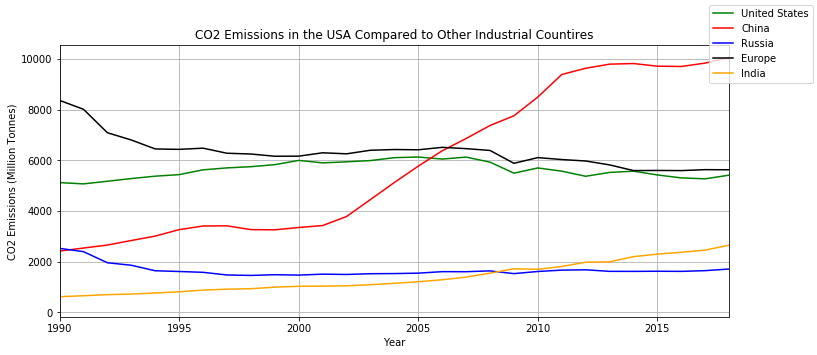

In [259]:
Co2_Emissions_USA=Co2_Emissions_df[Co2_Emissions_df.country=="United States"]
Co2_Emissions_China=Co2_Emissions_df[Co2_Emissions_df.country=="China"]
Co2_Emissions_Russia=Co2_Emissions_df[Co2_Emissions_df.country=="Russia"]
Co2_Emissions_Europe=Co2_Emissions_df[Co2_Emissions_df.country=="Europe"]
Co2_Emissions_India=Co2_Emissions_df[Co2_Emissions_df.country=="India"]
fig,ax=plt.subplots(figsize=(12,5))
ax.plot(Co2_Emissions_USA.year,Co2_Emissions_USA.co2,color="green",label="United States")
ax.plot(Co2_Emissions_China.year,Co2_Emissions_China.co2,color="red",label="China")
ax.plot(Co2_Emissions_Russia.year,Co2_Emissions_Russia.co2,color="blue",label="Russia")
ax.plot(Co2_Emissions_Europe.year,Co2_Emissions_Europe.co2,color="black",label="Europe")
ax.plot(Co2_Emissions_India.year,Co2_Emissions_India.co2,color="Orange",label="India")
plt.grid()
plt.ylabel("CO2 Emissions (Million Tonnes)",)
plt.xlabel("Year")
plt.xlim(1990,2018)
plt.title("CO2 Emissions in the USA Compared to Other Industrial Countires")
fig.legend(loc="best")
plt.savefig("Top 5 Co2 Emissions")

C:\Users\osama\anaconda3\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Automatic legend placement (loc='best') not implemented for figure legend. Falling back on 'upper right'. This will raise an exception in 3.3.


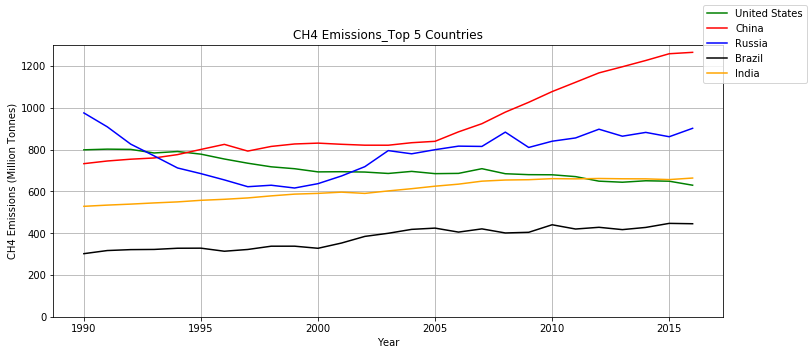

In [260]:
Co2_Emissions_USA=Co2_Emissions_df[Co2_Emissions_df.country=="United States"]
Co2_Emissions_China=Co2_Emissions_df[Co2_Emissions_df.country=="China"]
Co2_Emissions_Russia=Co2_Emissions_df[Co2_Emissions_df.country=="Russia"]
Co2_Emissions_Brazil=Co2_Emissions_df[Co2_Emissions_df.country=="Brazil"]
Co2_Emissions_India=Co2_Emissions_df[Co2_Emissions_df.country=="India"]
fig,ax=plt.subplots(figsize=(12,5))
ax.plot(Co2_Emissions_USA.year,Co2_Emissions_USA.methane,color="green",label="United States")
ax.plot(Co2_Emissions_China.year,Co2_Emissions_China.methane,color="red",label="China")
ax.plot(Co2_Emissions_Russia.year,Co2_Emissions_Russia.methane,color="blue",label="Russia")
ax.plot(Co2_Emissions_Brazil.year,Co2_Emissions_Brazil.methane,color="black",label="Brazil")
ax.plot(Co2_Emissions_India.year,Co2_Emissions_India.methane,color="Orange",label="India")
plt.grid()
plt.ylabel("CH4 Emissions (Million Tonnes)")
plt.ylim(0,1300)
plt.xlabel("Year")
plt.title("CH4 Emissions_Top 5 Countries")
fig.legend(loc="best")        
plt.savefig("Top 5 Co2 Emissions")

NameError: name 'Co2_Emissions_Germany' is not defined

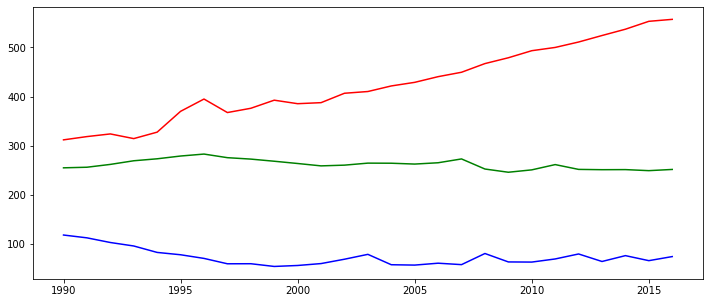

In [261]:
Co2_Emissions_USA=Co2_Emissions_df[Co2_Emissions_df.country=="United States"]
Co2_Emissions_China=Co2_Emissions_df[Co2_Emissions_df.country=="China"]
Co2_Emissions_Russia=Co2_Emissions_df[Co2_Emissions_df.country=="Russia"]
Co2_Emissions_Europe=Co2_Emissions_df[Co2_Emissions_df.country=="Germany"]
Co2_Emissions_India=Co2_Emissions_df[Co2_Emissions_df.country=="India"]
fig,ax=plt.subplots(figsize=(12,5))
ax.plot(Co2_Emissions_USA.year,Co2_Emissions_USA.nitrous_oxide,color="green",label="United States")
ax.plot(Co2_Emissions_China.year,Co2_Emissions_China.nitrous_oxide,color="red",label="China")
ax.plot(Co2_Emissions_Russia.year,Co2_Emissions_Russia.nitrous_oxide,color="blue",label="Russia")
ax.plot(Co2_Emissions_Germany.year,Co2_Emissions_Germany.nitrous_oxide,color="black",label="Germany")
ax.plot(Co2_Emissions_India.year,Co2_Emissions_India.nitrous_oxide,color="Orange",label="India")
plt.grid()
plt.ylabel("N2O Emissions (Million Tonnes)")
plt.xlabel("Year")
plt.title("N2O Emissions_Top 5 Countries")
fig.legend(loc="best")       

In [262]:
# Examining Top Co2 Emmissions Country through sorting Values:
Co2_Emissions_Sorted=Co2_Emissions.groupby("country").mean()
Co2_Emissions_Sorted=Co2_Emissions.sort_values(by=['co2'],ascending=False)
Co2_Emissions_Sorted.head(50)

,country,year,co2,co2_growth_prct,co2_growth_abs,consumption_co2,trade_co2,trade_co2_share,co2_per_capita,consumption_co2_per_capita,...,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,primary_energy_consumption,energy_per_capita,energy_per_gdp,population,gdp
23662,World,2018,36572.754,1.160,419.493,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.631091e+09,NaN
23661,World,2017,36153.262,1.340,478.162,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.547859e+09,NaN
23660,World,2016,35675.099,0.599,212.353,NaN,NaN,NaN,0.0,NaN,...,6.613,8550.06,1.146,3054.00,0.409,153848.433,20612.002,1.444,7.464022e+09,1.065610e+14
23658,World,2014,35505.827,0.846,297.941,NaN,NaN,NaN,0.0,NaN,...,6.777,8477.25,1.162,2999.32,0.411,150489.502,20628.307,1.475,7.295291e+09,1.019990e+14
23659,World,2015,35462.747,-0.121,-43.080,NaN,NaN,NaN,0.0,NaN,...,6.756,8660.01,1.173,3052.82,0.414,151720.063,20558.840,1.447,7.379797e+09,1.048550e+14
23657,World,2013,35207.886,0.826,288.597,NaN,NaN,NaN,0.0,NaN,...,6.790,8339.46,1.157,2941.00,0.408,149089.930,20676.546,1.502,7.210582e+09,9.927970e+13
23656,World,2012,34919.289,1.636,561.923,NaN,NaN,NaN,0.0,NaN,...,6.785,8374.14,1.175,2970.41,0.417,146252.983,20524.349,1.513,7.125828e+09,9.664920e+13
23655,World,2011,34357.366,3.903,1290.715,NaN,NaN,NaN,0.0,NaN,...,6.789,8280.11,1.176,2943.30,0.418,144255.091,20487.305,1.535,7.041194e+09,9.395210e+13
23654,World,2010,33066.651,4.896,1543.508,NaN,NaN,NaN,0.0,NaN,...,6.692,8170.01,1.174,2860.55,0.411,140722.294,20227.951,1.591,6.956824e+09,8.845410e+13
23652,World,2008,31875.756,3.224,995.610,NaN,NaN,NaN,0.0,NaN,...,6.621,8017.25,1.181,2802.99,0.413,136130.341,20051.342,1.641,6.789089e+09,8.296380e+13


In [263]:
Co2_Emissions_country=Co2_Emissions.set_index("country")
Co2_Emissions_country=Co2_Emissions_country.loc[Co2_Emissions_country["year"] >=1990]
Co2_Emissions_country=Co2_Emissions_country.loc["World"]
Co2_Emissions_country.to_csv("CO2 Emissions_world.csv",index=False)

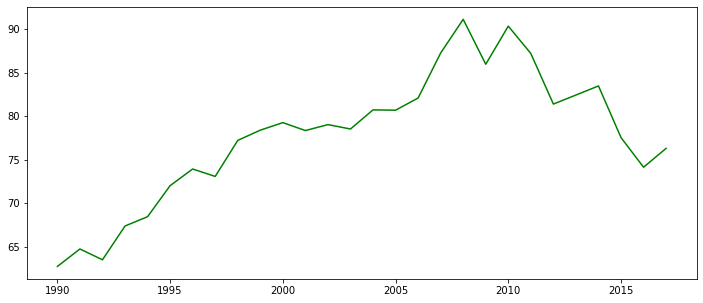

In [264]:
f_path=os.path.join("CO2 Emissions by state.xlsx")
Co2_Emissions_bystate=pd.read_excel(f_path,header=None,index=False)
Co2_Emissions_bystate=Co2_Emissions_bystate.dropna()
Co2_Emissions_bystate=Co2_Emissions_bystate.transpose()
Co2_Emissions_bystate=Co2_Emissions_bystate.rename(columns=Co2_Emissions_bystate.iloc[0])
Co2_Emissions_bystate=Co2_Emissions_bystate.drop([0])
Co2_Emissions_bystate=Co2_Emissions_bystate[0:28]
fig,ax=plt.subplots(figsize=(12,5))
ax.plot(Co2_Emissions_bystate.State,Co2_Emissions_bystate.Iowa,color="green",label="United States")

In [271]:
f_path=os.path.join("GHGbystate.xlsx")
GHG_Emissions_bystate=pd.read_excel(f_path,header=None,index=False)
GHG_Emissions_bystate=GHG_Emissions_bystate.rename(columns=GHG_Emissions_bystate.iloc[0])
GHG_Emissions_bystate=GHG_Emissions_bystate.drop([0])
GHG_Emissions_bystate=GHG_Emissions_bystate[GHG_Emissions_bystate.State=="Iowa"]

In [237]:
GHG_Emissions_bystate

,State,Year,Total GHG Emissions Excluding LUCF (MtCO2e),Total GHG Emissions Including LUCF (MtCO2e),Total CO2 (excluding LUCF) (MtCO2e),TotalCH4,TotalN2O,Total F-Gas (MtCO2e),Energy (MtCO2e),Industrial Processes (MtCO2e),...,Bunker Fuels (MtCO2e),Electric Power (MtCO2e),Commercial (MtCO2e),Residential (MtCO2e),Industrial (MtCO2e),Transportation (MtCO2e),Fugitive Emissions (MtCO2e),State GDP (Million US$ (chained 1997/2005)),Population (People),Total Energy Use (Thous. tonnes oil eq. (ktoe))
16,Iowa,1990,96.4912,88.0531,65.6078,11.8911,18.6992,0.29311,65.0098,1.95792,...,0,26.7851,3.20396,5.08904,12.8022,17.1172,0.0122434,63460,2781018,23835.5
68,Iowa,1991,99.7725,91.3685,67.7701,12.2456,19.4649,0.291923,67.1245,2.04377,...,0,27.6395,3.5216,5.61169,13.7745,16.5661,0.0110545,63818,2797613,24747.7
120,Iowa,1992,96.8282,88.3714,66.4568,11.9995,18.0744,0.297497,65.7734,2.133,...,0,26.6475,3.14188,5.27791,14.2609,16.4359,0.00928703,66862,2818401,24527.7
172,Iowa,1993,99.0961,90.5793,69.9197,11.743,17.0885,0.344793,69.7351,1.75418,...,0,28.523,3.31734,5.88852,14.8487,17.1519,0.00562363,66913,2836972,26131.7
224,Iowa,1994,103.246,94.7814,71.2929,12.0809,19.46,0.41196,70.8268,2.12461,...,0,28.5102,2.93088,5.63131,15.6503,18.1026,0.00147821,72503,2850746,26913
276,Iowa,1995,106.265,97.9063,74.722,12.0221,18.9445,0.576506,74.2002,2.31966,...,0,30.4743,3.17565,5.81055,15.995,18.7448,0,74568,2867373,27867.1
328,Iowa,1996,109.697,101.191,77.2675,11.2715,20.4801,0.677698,76.7749,2.45791,...,0,30.4304,3.76451,6.50668,16.0299,20.0434,0,78834,2880000,28945.1
380,Iowa,1997,109.531,101.084,77.3828,11.6341,19.7314,0.78292,76.3602,3.08936,...,0,31.0272,3.8681,6.08153,15.802,19.5814,0,96790,2891119,28607.7
432,Iowa,1998,113.938,105.543,79.613,12.4071,21.0942,0.823469,78.4816,3.25201,...,0,33.9077,3.37259,5.10804,15.8715,20.2218,0,97594,2902872,28845.3
484,Iowa,1999,113.546,105.209,80.4269,12.7053,19.5071,0.906375,79.4986,3.09161,...,0,33.9686,3.78206,5.58519,16.138,20.0247,0,100119,2917634,30120.1
